In [68]:
# IMPORTING THE NECESSARY PACKAGES

# FOR BASIC OPERATIONS WITH THE DATASET
import pandas as pd
import numpy as np

# FOR ML(MACHINE LEARNING)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# FOR DATA VISUALISATION
from matplotlib import pyplot as plt
import seaborn as sns
import graphviz
import pydotplus
import io
import imageio

%matplotlib inline


## Spotify Song Attributes EDA (Exploratory Data Analysis)  & Prediction

### 1. [Data Wrangling](#Data-Wrangling)

- Import the Spotify 1920-2020 dataset.
- Cleaning the data, i.e. checking for duplicates, removing unnecessary columns, etc.

### 2. [EDA](#EDA-(Exploratory-Data-Analysis))

- Visualising the data and observe the structure.
- Observe the corelation of various other parameters with popularity.

### 3. [Prediction](#Prediction)

- Predicting the popularity of a song.

## Data Wrangling 

In [69]:
df = pd.read_csv("data.csv")

In [70]:
type(df)

pandas.core.frame.DataFrame

In [71]:
df.describe()

acousticness   danceability   duration_ms         energy  \
count  169909.000000  169909.000000  1.699090e+05  169909.000000   
mean        0.493214       0.538150  2.314062e+05       0.488593   
std         0.376627       0.175346  1.213219e+05       0.267390   
min         0.000000       0.000000  5.108000e+03       0.000000   
25%         0.094500       0.417000  1.710400e+05       0.263000   
50%         0.492000       0.548000  2.086000e+05       0.481000   
75%         0.888000       0.667000  2.629600e+05       0.710000   
max         0.996000       0.988000  5.403500e+06       1.000000   

            explicit  instrumentalness            key       liveness  \
count  169909.000000     169909.000000  169909.000000  169909.000000   
mean        0.084863          0.161937       5.200519       0.206690   
std         0.278679          0.309329       3.515257       0.176796   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.000000          0.000000       2.000000       0.098400   
50%         0.000000          0.000204       5.000000       0.135000   
75%         0.000000          0.086800       8.000000       0.263000   
max         1.000000          1.000000      11.000000       1.000000   

            loudness           mode     popularity    speechiness  \
count  169909.000000  169909.000000  169909.000000  169909.000000   
mean      -11.370289       0.708556      31.556610       0.094058   
std         5.666765       0.454429      21.582614       0.149937   
min       -60.000000       0.000000       0.000000       0.000000   
25%       -14.470000       0.000000      12.000000       0.034900   
50%       -10.474000       1.000000      33.000000       0.045000   
75%        -7.118000       1.000000      48.000000       0.075400   
max         3.855000       1.000000     100.000000       0.969000   

               tempo        valence           year  
count  169909.000000  169909.000000  169909.000000  
mean      116.948017       0.532095    1977.223231  
std        30.726937       0.262408      25.593168  
min         0.000000       0.000000    1921.000000  
25%        93.516000       0.322000    1957.000000  
50%       114.778000       0.544000    1978.000000  
75%       135.712000       0.749000    1999.000000  
max       244.091000       1.000000    2020.000000

- 169,909 songs are present in this dataset

In [72]:
print(df.shape)
df.head()

(169909, 19)


acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [73]:
df.info()
print(len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      169909 non-null  float64
 1   artists           169909 non-null  object 
 2   danceability      169909 non-null  float64
 3   duration_ms       169909 non-null  int64  
 4   energy            169909 non-null  float64
 5   explicit          169909 non-null  int64  
 6   id                169909 non-null  object 
 7   instrumentalness  169909 non-null  float64
 8   key               169909 non-null  int64  
 9   liveness          169909 non-null  float64
 10  loudness          169909 non-null  float64
 11  mode              169909 non-null  int64  
 12  name              169909 non-null  object 
 13  popularity        169909 non-null  int64  
 14  release_date      169909 non-null  object 
 15  speechiness       169909 non-null  float64
 16  tempo             16

There are some features that don't necessarily need to be included in the final model.
- name: The popularity doesn't have any relation with the name of the song. Hence, this feature could be excluded.
- artists: It is an important feature. Hence, needs to be included.
- release_date/ year: Either one of these two need to be included.
- id: It is unique for each track and hence, can't assist a model. 

In [74]:
data_columns = ['name', 'artists', 'release_date', 'year', 'id']
for data_col in data_columns:
  print(f'{data_col:<15}: {df[data_col].nunique()} unique values.')

name           : 132940 unique values.
artists        : 33375 unique values.
release_date   : 10882 unique values.
year           : 100 unique values.
id             : 169909 unique values.


- So, dropping the columns release_date, id, name

In [75]:
df = df.drop(columns = ['release_date', 'name', 'id'])
print(df.shape)
df.head()

(169909, 16)


acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       158648  0.1950         0             0.563   10    0.1510   -12.428   
1       282133  0.0135         0             0.901    8    0.0763   -28.454   
2       104300  0.2200         0             0.000    5    0.1190   -19.924   
3       180760  0.1300         0             0.887    1    0.1110   -14.734   
4       687733  0.2040         0             0.908   11    0.0980   -16.829   

   mode  popularity  speechiness    tempo  valence  year  
0     1           0       0.0506  118.469   0.7790  1928  
1     1           0       0.0462   83.972   0.0767  1928  
2     0           0       0.9290  107.177   0.8800  1928  
3     0           0       0.0926  108.003   0.7200  1928  
4     1           1       0.0424   62.149   0.0693  1928

Now that the unique id is removed, let's see if there are any duplicates present in the data 

In [76]:
df.duplicated().sum() 

669

So, there are 669 duplicate rows present.

In [77]:
# Removing the duplicate rows
df = df.drop_duplicates()
df.shape

(169240, 16)

In [78]:
# Checking for any missing values in the dataset
df.isnull().sum().sum()

0

Now, there are no duplicate rows present and nor are there any null, or missing values in the dataset. This would allow us to proceed further. 

### EDA (Exploratory Data Analysis) 

In [79]:
str_cols = df.columns[df.dtypes == 'object']
num_cols = df.columns[df.dtypes != 'object']
print(f'There are {len(num_cols)} numeric column/s & {len(str_cols)} string column/s present in this dataset.')

There are 15 numeric column/s & 1 string column/s present in this dataset.


The corelation can only be observed between numeric values.

In [80]:
df_num = df[num_cols]
df_num.head()

acousticness  danceability  duration_ms  energy  explicit  \
0         0.995         0.708       158648  0.1950         0   
1         0.994         0.379       282133  0.0135         0   
2         0.604         0.749       104300  0.2200         0   
3         0.995         0.781       180760  0.1300         0   
4         0.990         0.210       687733  0.2040         0   

   instrumentalness  key  liveness  loudness  mode  popularity  speechiness  \
0             0.563   10    0.1510   -12.428     1           0       0.0506   
1             0.901    8    0.0763   -28.454     1           0       0.0462   
2             0.000    5    0.1190   -19.924     0           0       0.9290   
3             0.887    1    0.1110   -14.734     0           0       0.0926   
4             0.908   11    0.0980   -16.829     1           1       0.0424   

     tempo  valence  year  
0  118.469   0.7790  1928  
1   83.972   0.0767  1928  
2  107.177   0.8800  1928  
3  108.003   0.7200  1928  
4   62.149   0.0693  1928

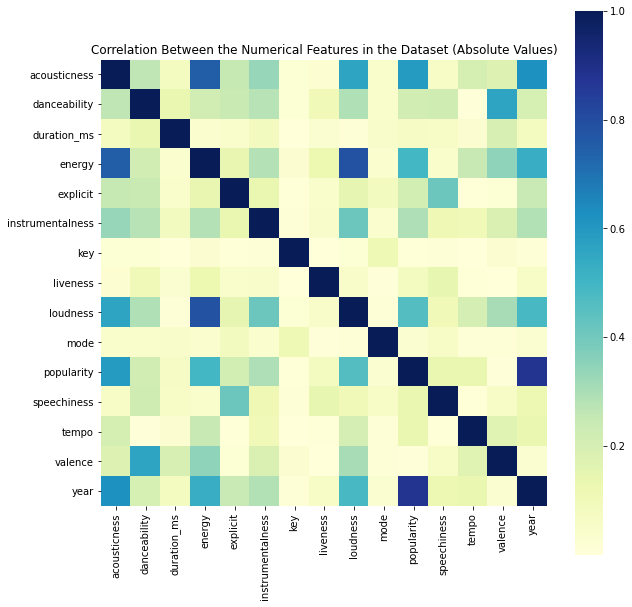

In [81]:
# Plotting a heatmap for corelation
corr = np.abs(df_num.corr())
fig, ax = plt.subplots(figsize=(10, 10))
cmap = "YlGnBu"
sns.heatmap(corr, cmap=cmap, square=True)
plt.title('Correlation Between the Numerical Features in the Dataset (Absolute Values)')
# Save as an image
#plt.savefig('corr.png', dpi = 400)
plt.show()

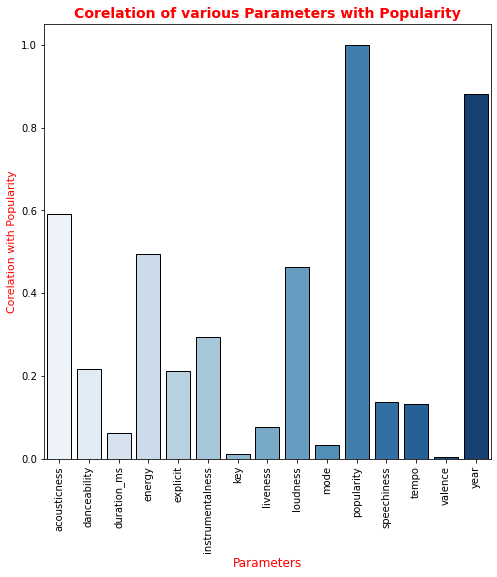

In [82]:
corr_pop = np.abs(corr['popularity'])
fig, ax = plt.subplots(figsize = (8, 8))

ax = sns.barplot(x = corr_pop.index, y = corr_pop, palette = "Blues", orient = "v", edgecolor = 'black', ax=ax)
ax.set_ylabel('Corelation with Popularity', c = 'r', fontsize=11)
ax.set_xlabel('Parameters', c='r', fontsize=12)
ax.set_title('Corelation of various Parameters with Popularity', c='r', fontsize=14, weight = 'bold')
plt.xticks(rotation = 90)
# Save as an image
#plt.savefig('pop_corr.png', dpi = 400)
plt.show()

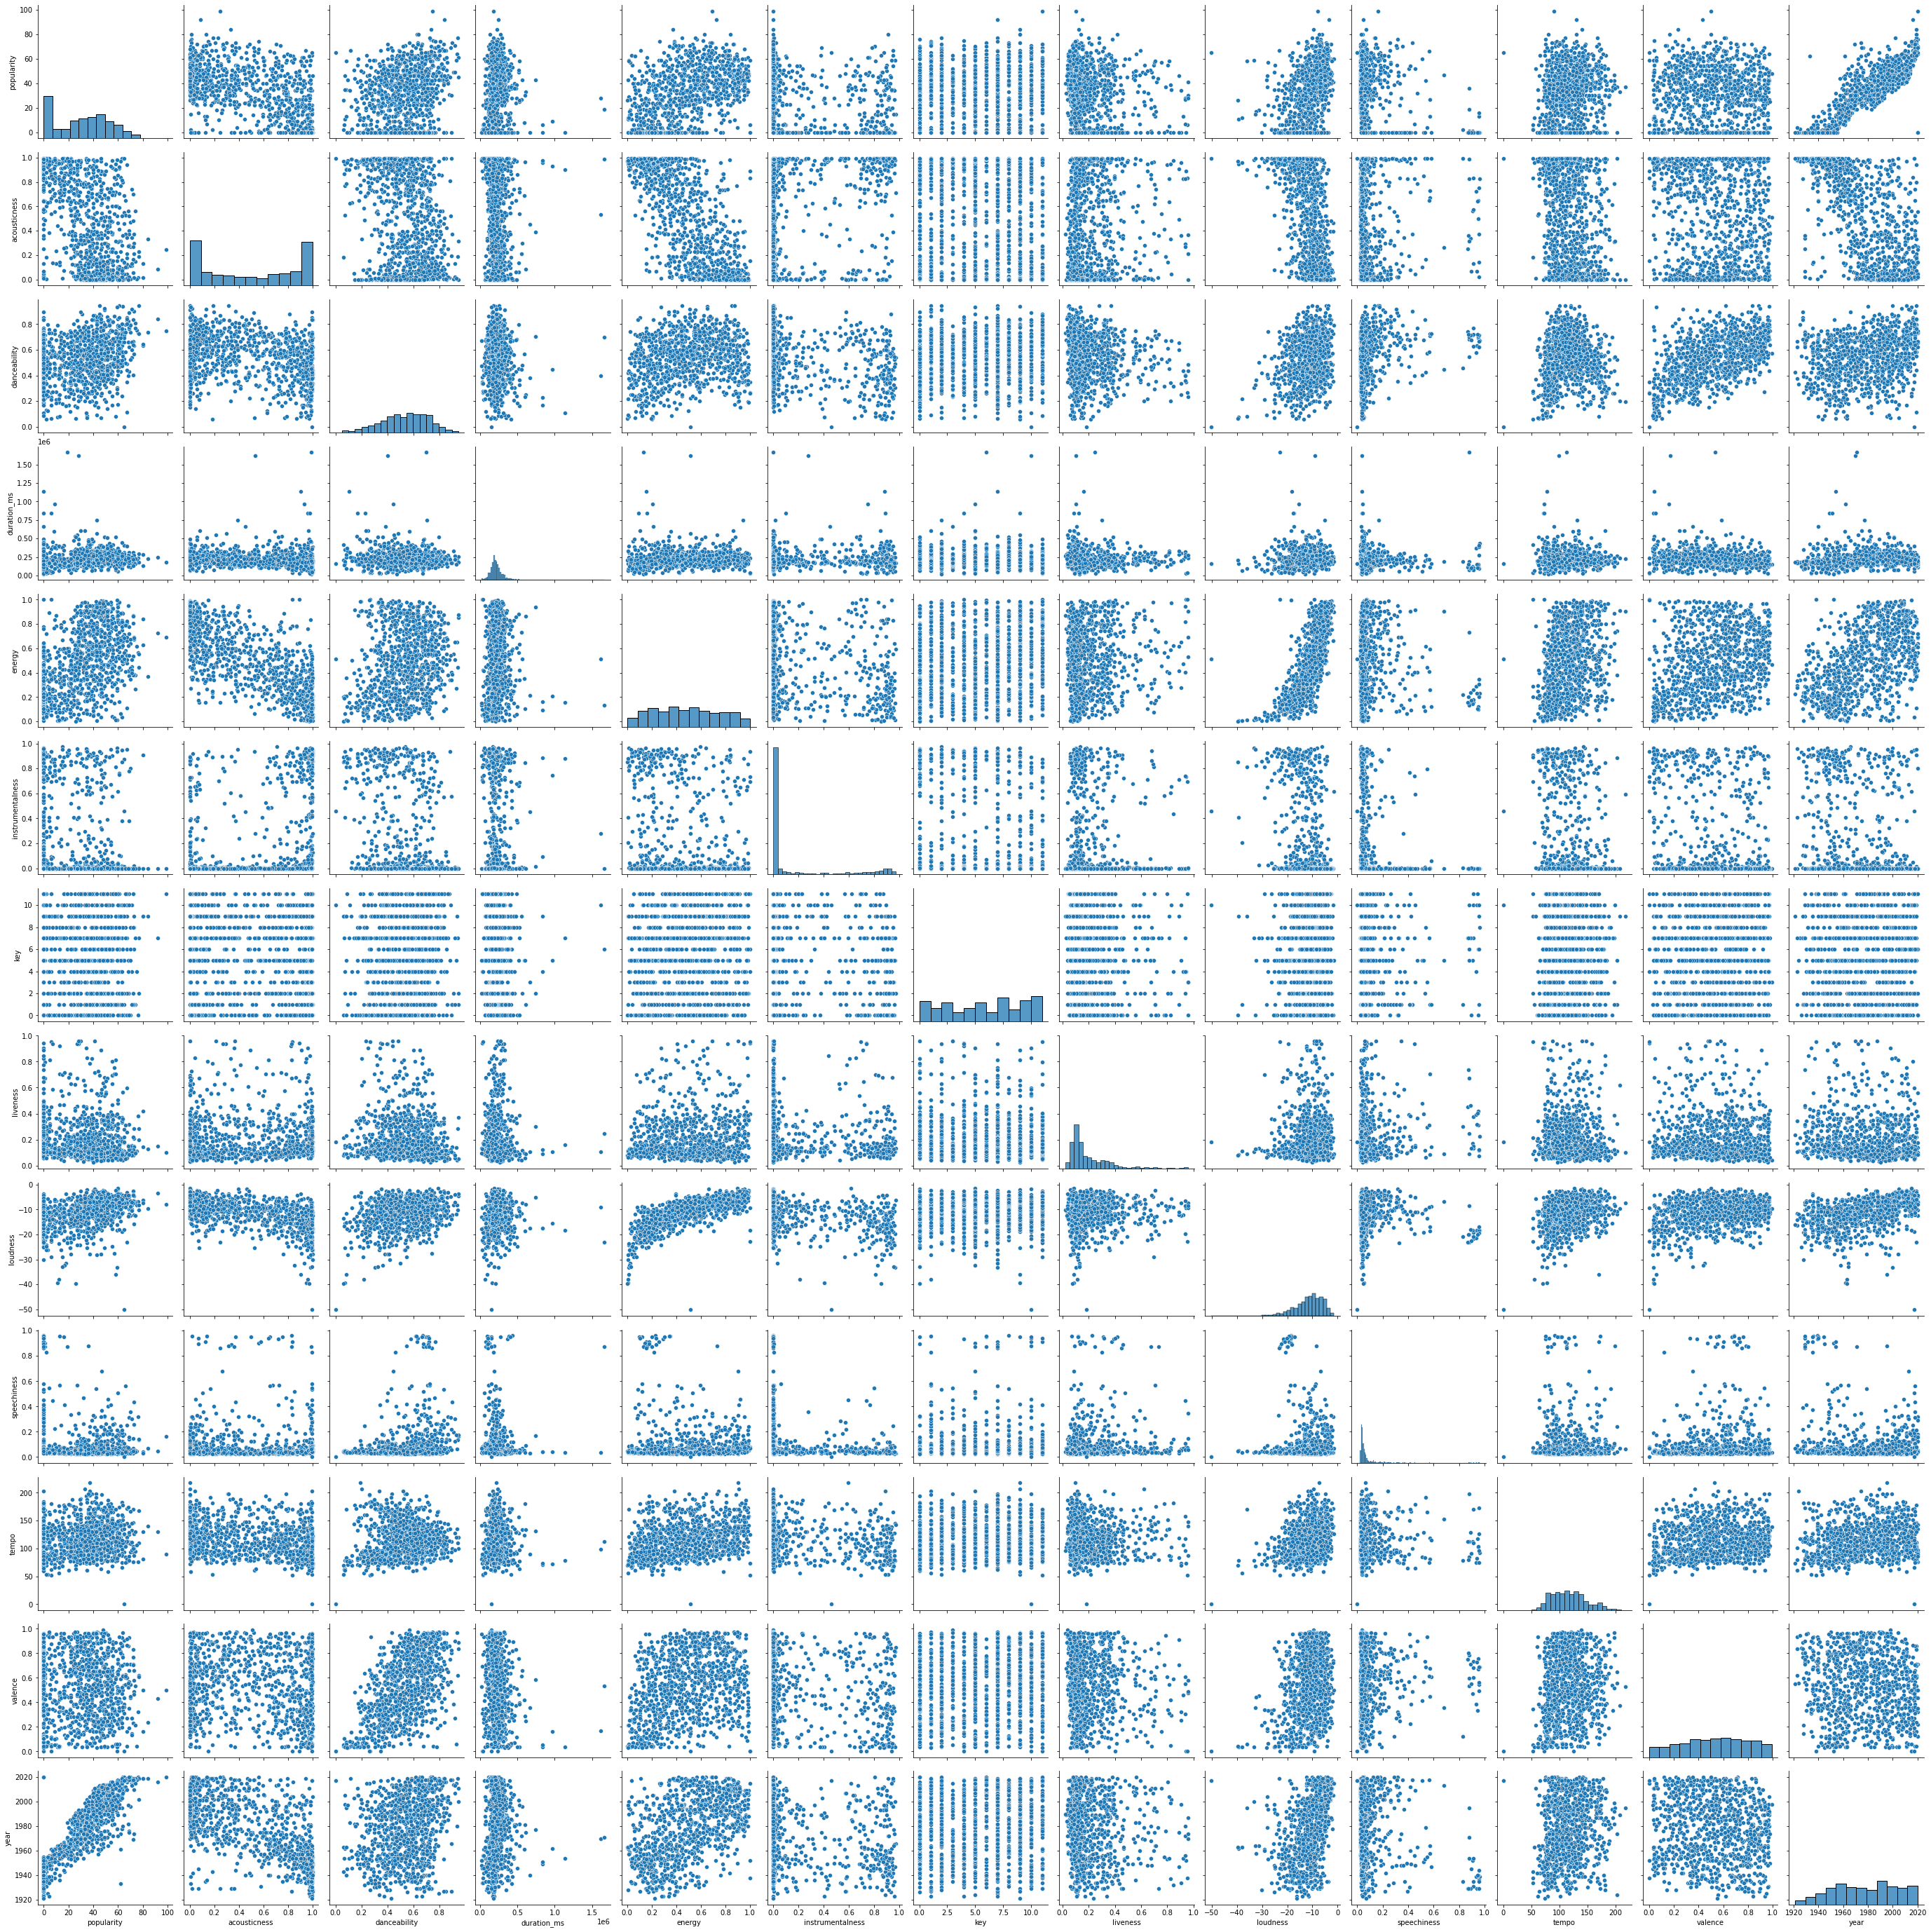

In [83]:
sns.pairplot(df.sample(1000), height=3, vars=['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 
       'speechiness', 'tempo', 'valence', 'year'])
# Save as an image
#plt.savefig('pair_plot.png', dpi = 400)
#%matplotlib notebook # To get a better look at the plot
plt.show()

In [84]:
df['artists'].nunique() # No. of unique artists in the dataset

33375

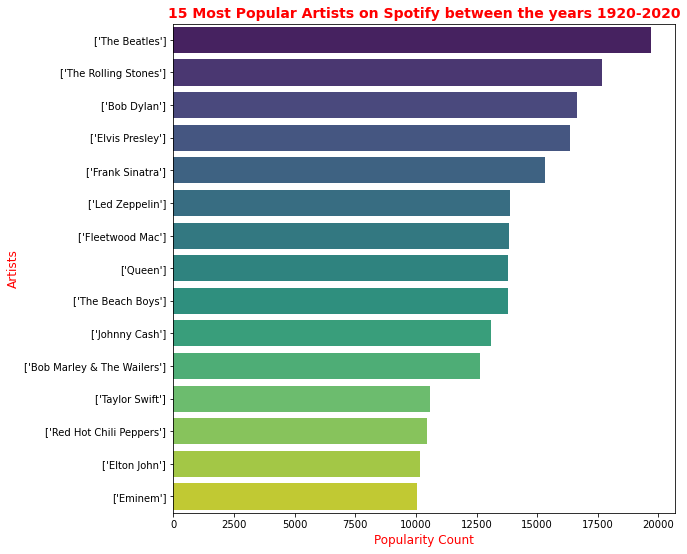

In [85]:
# MOST POPULAR ARTISTS ON SPOTIFY
fig, ax = plt.subplots(figsize = (9, 9))
lead_artists = df.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(15)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="viridis", orient="h", ax=ax)
ax.set_xlabel('Popularity Count', c='r', fontsize=12)
ax.set_ylabel('Artists', c='r', fontsize=12)
ax.set_title('15 Most Popular Artists on Spotify between the years 1920-2020', c='r', fontsize=14, weight = 'bold')
# Save as an image
#plt.savefig('pop_art.png', dpi = 400)
plt.show()

#### Explicit Songs
Their corelation with popularity is 0.2134 

In [86]:
corr_pop['explicit']

0.21340365677084142

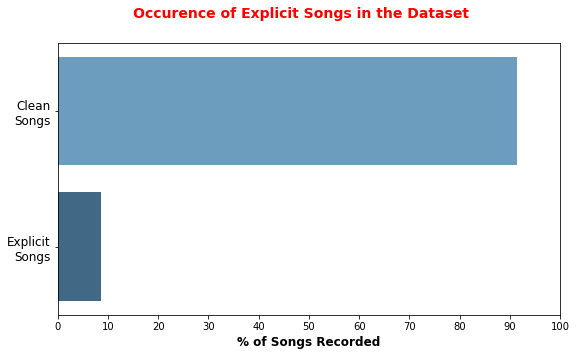

In [87]:
fig, ax = plt.subplots(figsize = (9, 5))
y_ticks = ['Clean\nSongs', 'Explicit\nSongs']
ax = sns.barplot(x = (df['explicit'].value_counts(normalize=True)*100), y = y_ticks, data = df, palette='Blues_d')
ax.set_xlabel('% of Songs Recorded', fontsize=12, weight='bold')
ax.set_xlim(0.0,100.0)
ax.set_xticks(ticks=range(0,101,10))
ax.set_yticklabels(labels=y_ticks, fontsize=12)
plt.suptitle('Occurence of Explicit Songs in the Dataset', fontsize=14, c='r', weight = "bold")
# Save as an image
#plt.savefig('exp_occ.png', dpi = 400)
plt.show()

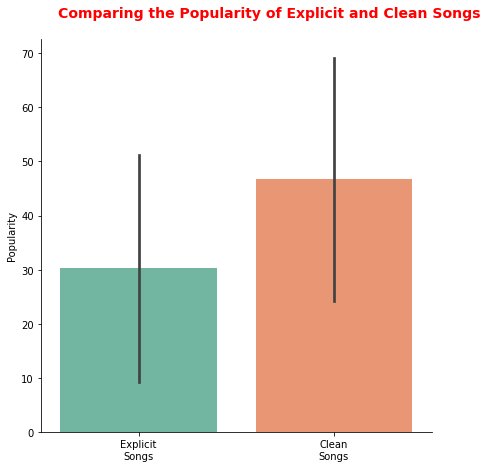

In [88]:
exp_data = sns.catplot(data=df, kind="bar", x="explicit", y="popularity", ci="sd", palette='Set2', height=6)
exp_data.fig.suptitle('Comparing the Popularity of Explicit and Clean Songs', y = 1.05, x = 0.6, c='r' ,  fontsize=14, weight = 'bold')
exp_data.set_axis_labels("", "Popularity")
exp_data.set_xticklabels(['Explicit\nSongs', 'Clean\nSongs'])
# Save as an image
#plt.savefig('exp_pop.png', dpi = 400)
plt.show()

#### Key

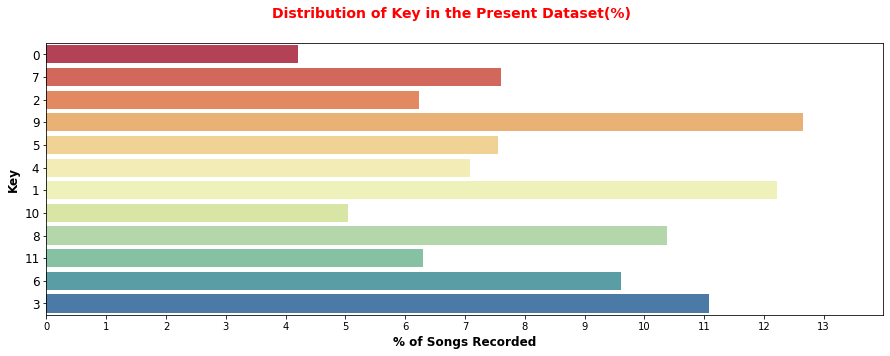

In [89]:
fig, ax = plt.subplots(figsize = (15, 5))
key_data = df['key'].value_counts(normalize=True, sort=True, ascending=True)*100
y_ticks = df['key'].value_counts().index
ax = sns.barplot(x = key_data.values, y= y_ticks, data = df, orient='h', palette='Spectral')
ax.set_xlabel('% of Songs Recorded', fontsize=12, weight='bold')
ax.set_ylabel('Key', fontsize=12, weight='bold')
ax.set_xlim(0.0,14.0, 0)
ax.set_xticks(ticks=range(0,14,1))
ax.set_yticklabels(labels=y_ticks, fontsize=12) #
plt.suptitle('Distribution of Key in the Present Dataset(%)', fontsize=14, c='r', weight = 'bold')
# Save as an image
#plt.savefig('key_dist.png', dpi = 400)
plt.show()

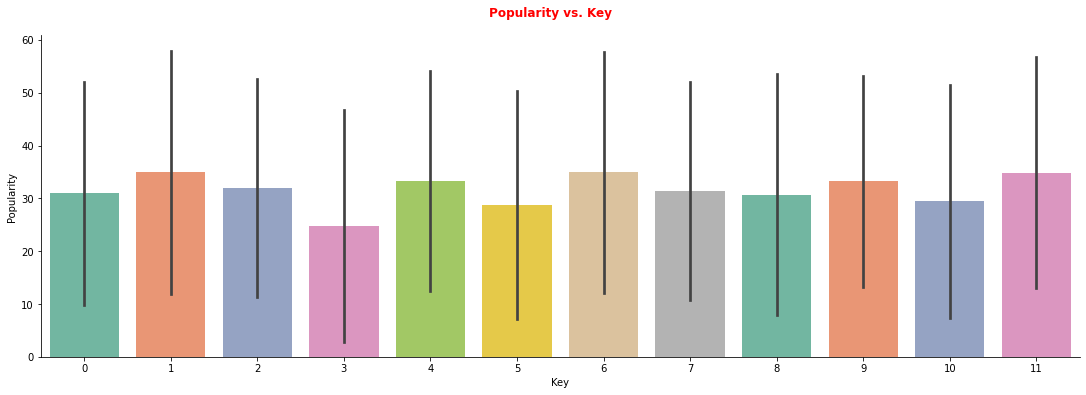

In [90]:
keys_data = sns.catplot(data=df, kind="bar", x="key", y="popularity", palette='Set2', ci = 'sd', height=5, aspect = 3)
keys_data.fig.suptitle('Popularity vs. Key', y=1.05, c='r', weight='bold')
keys_data.set_axis_labels("Key", "Popularity")
# Save as an image
#plt.savefig('key_pop.png', dpi = 400)
plt.show()

Now, comparing the rest of the numerical features with popularity,

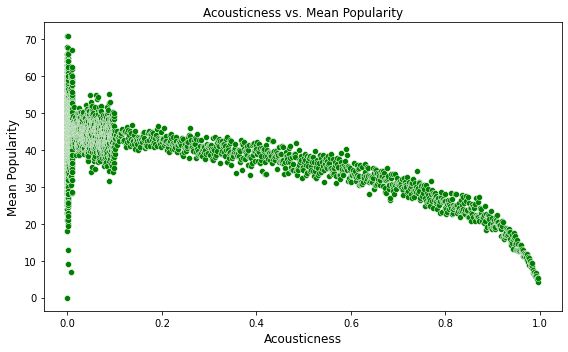

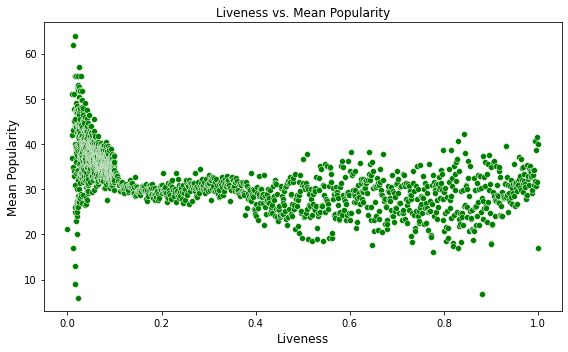

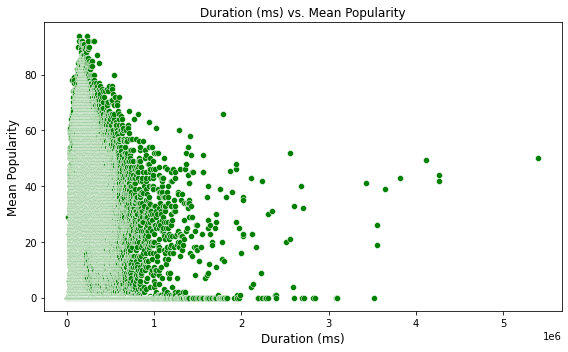

In [91]:
fig, ax = plt.subplots(figsize=(8, 5))
ax1_data =  df.groupby('acousticness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['acousticness'], y = ax1_data['popularity'], color='green', ax=ax)
ax.set_title('Acousticness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
ax.set_xlabel('Acousticness', fontsize=12)
plt.tight_layout()
# Save as an image
#plt.savefig('acc_pop.png', dpi = 400)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
ax1_data =  df.groupby('liveness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['liveness'], y = ax1_data['popularity'], color='green', ax=ax)
ax.set_title('Liveness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
ax.set_xlabel('Liveness', fontsize=12)
plt.tight_layout()
# Save as an image
#plt.savefig('liv_pop.png', dpi = 400)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
ax1_data =  df.groupby('duration_ms')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['duration_ms'], y = ax1_data['popularity'], color='green', ax=ax)
ax.set_title('Duration (ms) vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
ax.set_xlabel('Duration (ms)', fontsize=12)
plt.tight_layout()
# Save as an image
#plt.savefig('dur_pop.png', dpi = 400)
plt.show()

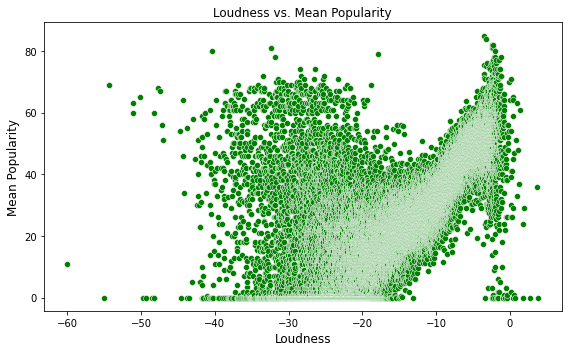

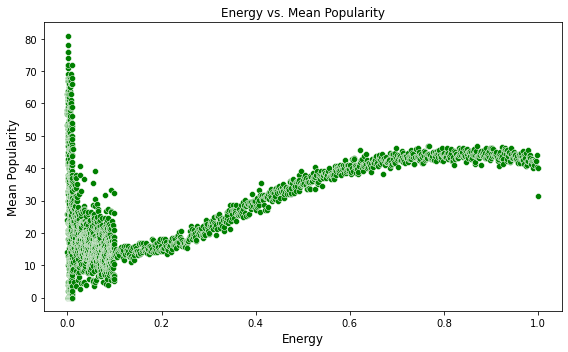

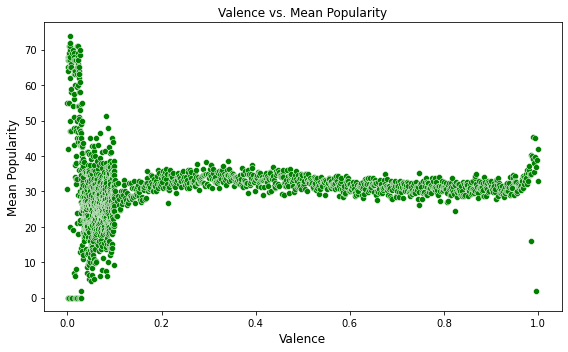

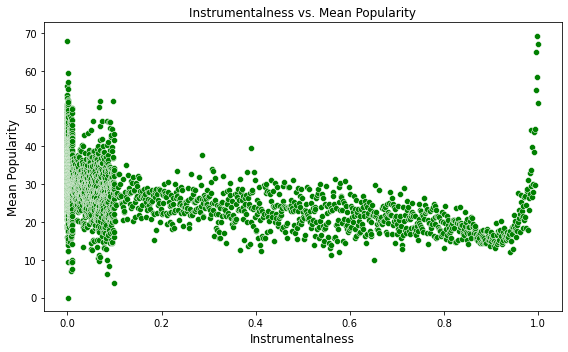

In [92]:
fig, ax = plt.subplots(figsize=(8, 5))
ax1_data =  df.groupby('loudness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['loudness'], y = ax1_data['popularity'], color='green', ax=ax)
ax.set_title('Loudness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
ax.set_xlabel('Loudness', fontsize=12)
plt.tight_layout()
# Save as an image
#plt.savefig('loud_pop.png', dpi = 400)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
ax1_data =  df.groupby('energy')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['energy'], y = ax1_data['popularity'], color='green', ax=ax)
ax.set_title('Energy vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
ax.set_xlabel('Energy', fontsize=12)
plt.tight_layout()
# Save as an image
#plt.savefig('ener_pop.png', dpi = 400)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
ax1_data =  df.groupby('valence')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['valence'], y = ax1_data['popularity'], color='green', ax=ax)
ax.set_title('Valence vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
ax.set_xlabel('Valence', fontsize=12)
plt.tight_layout()
# Save as an image
#plt.savefig('val_pop.png', dpi = 400)
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))
ax1_data =  df.groupby('instrumentalness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['instrumentalness'], y = ax1_data['popularity'], color='green', ax=ax)
ax.set_title('Instrumentalness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
ax.set_xlabel('Instrumentalness', fontsize=12)
plt.tight_layout()
# Save as an image
#plt.savefig('inst_pop.png', dpi = 400)
plt.show()

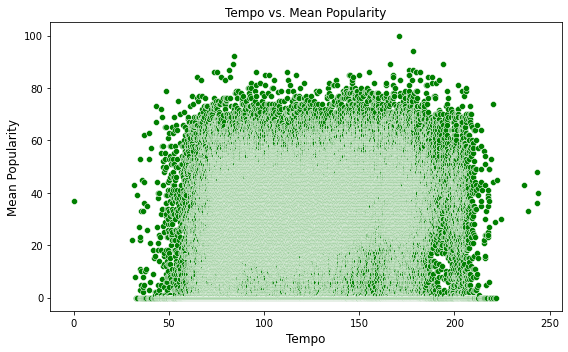

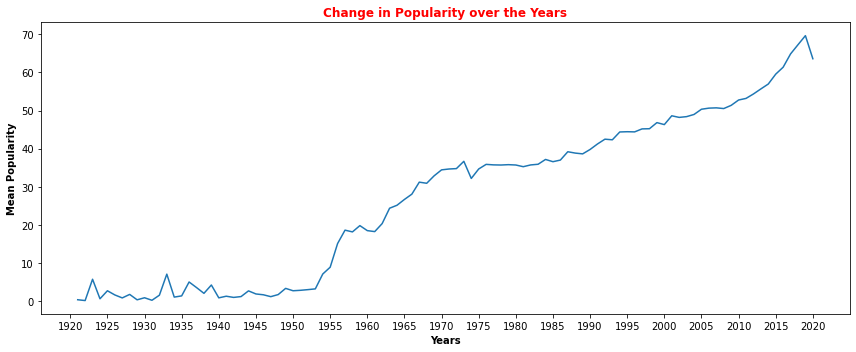

In [93]:
fig, ax = plt.subplots(figsize=(8, 5))
ax1_data =  df.groupby('tempo')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['tempo'], y = ax1_data['popularity'], color='green', ax=ax)
ax.set_title('Tempo vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
ax.set_xlabel('Tempo', fontsize=12)
plt.tight_layout()
# Save as an image
#plt.savefig('tempo_pop.png', dpi = 400)
plt.show()

fig, ax = plt.subplots(figsize=(12, 5))
ax = df.groupby('year')['popularity'].mean().plot()
ax.set_title('Change in Popularity over the Years', c='r', weight='bold')
ax.set_ylabel('Mean Popularity', weight='bold')
ax.set_xlabel('Years', weight='bold')
ax.set_xticks(range(1920, 2021, 5))
plt.tight_layout()
# Save as an image
#plt.savefig('year_pop.png', dpi = 400)
plt.show()

### Prediction

Here, the model would predict whether the popularity of a song is greater than 80, based on the other numerical parameters.
So, first creating another column which would indicate that.
- 0: Popularity < 80
- 1: Popularity > 80

In [94]:
len(df[df['popularity'] > 80])

457

In [95]:
pop_list = df['popularity'].tolist()
len(pop_list)

169240

In [96]:
pop_val = []
ans = 0
for pop in pop_list:
    if pop > 80:
        pop_val.append(1)
    else:
        pop_val.append(0)

In [97]:
df['Popularity greater than 80'] = pop_val

In [98]:
print('No. of Songs with Popularity > 80: ',len(df[df['Popularity greater than 80'] == 1]))
print('No. of Songs with Popularity < 80: ',len(df[df['Popularity greater than 80'] == 0]))

No. of Songs with Popularity > 80:  457
No. of Songs with Popularity < 80:  168783


In [99]:
df.head(5)

acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       158648  0.1950         0             0.563   10    0.1510   -12.428   
1       282133  0.0135         0             0.901    8    0.0763   -28.454   
2       104300  0.2200         0             0.000    5    0.1190   -19.924   
3       180760  0.1300         0             0.887    1    0.1110   -14.734   
4       687733  0.2040         0             0.908   11    0.0980   -16.829   

   mode  popularity  speechiness    tempo  valence  year  \
0     1           0       0.0506  118.469   0.7790  1928   
1     1           0       0.0462   83.972   0.0767  1928   
2     0           0       0.9290  107.177   0.8800  1928   
3     0           0       0.0926  108.003   0.7200  1928   
4     1           1       0.0424   62.149   0.0693  1928   

   Popularity greater than 80  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0

All data must be in numeric form in order to create a ML model. In the present dataset, the column 'name' is not of a numeric value. Hence, LabelEncoder is used to encode all the names of the artists.

In [100]:
# Creating a new dataset
new_df = df

In [101]:
new_df = new_df.apply(LabelEncoder().fit_transform)
new_df

acousticness  artists  danceability  duration_ms  energy  explicit  \
0               4712     4880           956        11294    1526         0   
1               4711    25163           627        33703     566         0   
2               4321    26351           997         4215    1551         0   
3               4712     9738          1029        15890    1461         0   
4               4707    10245           458        48817    1535         0   
...              ...      ...           ...          ...     ...       ...   
169904          3890     8004          1123        12283    1774         1   
169905          2984    17559           967        13034    1716         0   
169906          4255    16987           762        15877    1870         0   
169907          3531     5031           894        13001    2092         0   
169908          3826    13224           760        23802    1759         0   

        instrumentalness  key  liveness  loudness  mode  popularity  \
0                   4963   10       891     14683     1           0   
1                   5301    8       603      1555     1           0   
2                      0    5       859      7249     0           0   
3                   5287    1       851     12377     0           0   
4                   5308   11       820     10287     1           1   
...                  ...  ...       ...       ...   ...         ...   
169904              1125    1       731     19650     1          75   
169905              3814    8       851     16204     1          64   
169906              2834    7       848     17779     1          70   
169907                 0    1       962     24507     1          70   
169908                 0    0       845     19724     1          65   

        speechiness  tempo  valence  year  Popularity greater than 80  
0               285  42620     1518     7                           0  
1               241  14076      607     7                           0  
2              1587  33118     1619     7                           0  
3               705  33776     1459     7                           0  
4               203   1179      533     7                           0  
...             ...    ...      ...   ...                         ...  
169904          822  27208     1045    99                           0  
169905          182  50748     1009    99                           0  
169906          784  47060      892    99                           0  
169907          164  52322     1211    99                           0  
169908           50  11263     1105    99                           0  

[169240 rows x 17 columns]

In [102]:
# Splitting the data into a test set and a training set
train, test = train_test_split(new_df, test_size = 0.1)
print("Training Size - {} , Test Size - {}".format(len(train), len(test)))

Training Size - 152316 , Test Size - 16924


In [103]:
c = DecisionTreeClassifier(min_samples_split = 50)
# The popularity won't be passed here as we want to predict the popularity
features = ['danceability', 'loudness', 'valence', 'acousticness', 'energy', 'liveness', 'instrumentalness', 'tempo', 'duration_ms', 'key', 'artists']
len(features)

11

In [104]:
X_train = train[features] # Selecting features from training set
y_train = train['Popularity greater than 80'] # Selecting the target column for training

X_test = test[features] # Selecting features from test set
y_test = test['Popularity greater than 80'] # Selecting the target column for testing

In [105]:
#  CREATING THE DECISION TREE
dt = c.fit(X_train, y_train)

In [106]:
# VISUALIZING THE DECISION TREE
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file = f, feature_names = features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    img.MAX_IMAGE_PIXELS = None
    plt.rcParams['figure.figsize'] = (20, 20)
    plt.imshow(img)

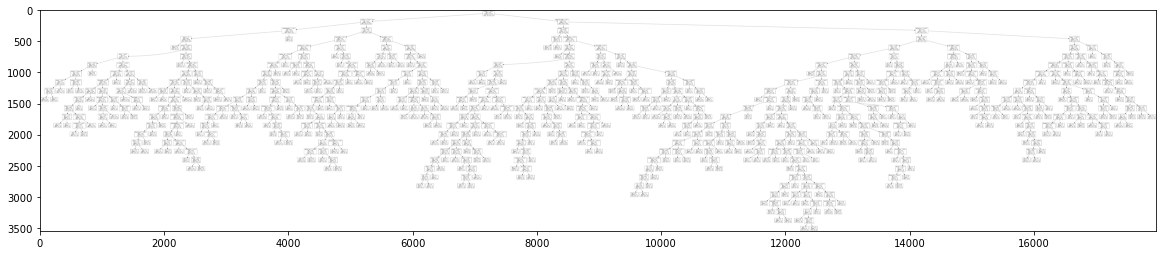

In [107]:
show_tree(dt, features, 'tree_draft_01.png')

In [108]:
y_predict = c.predict(X_test)
score = accuracy_score(y_test, y_predict)*100
print("Accuracy Score using Decision Tree - ", round(score, 3), "%")

Accuracy Score using Decision Tree -  99.657 %



Hence, it can be observed that the model designed here for predicting the popularity of the song is highly accurate.

##### Concludatory Remarks

In this project, by observing the relation of various attributes of a song with its popularity, a highly accurate predictive model was created which would predict the popularity of the song.

### K-means Clustering below

In [109]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [110]:
df = pd.read_csv("data.csv")
df_cluster = df.copy()
X = pd.DataFrame(df_cluster.iloc[:, [0,2,3,4,5,7,8,9,10,11,13,15,16,17,18]].values)

In [111]:
df_cluster.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

In [112]:
cols = df_cluster.iloc[:, [0,2,3,4,5,7,8,9,10,11,13,15,16,17,18]].columns

In [113]:
X.columns = cols

### Categorical Data Removed

In [114]:
X.head()

acousticness  danceability  duration_ms  energy  explicit  \
0         0.995         0.708     158648.0  0.1950       0.0   
1         0.994         0.379     282133.0  0.0135       0.0   
2         0.604         0.749     104300.0  0.2200       0.0   
3         0.995         0.781     180760.0  0.1300       0.0   
4         0.990         0.210     687733.0  0.2040       0.0   

   instrumentalness   key  liveness  loudness  mode  popularity  speechiness  \
0             0.563  10.0    0.1510   -12.428   1.0         0.0       0.0506   
1             0.901   8.0    0.0763   -28.454   1.0         0.0       0.0462   
2             0.000   5.0    0.1190   -19.924   0.0         0.0       0.9290   
3             0.887   1.0    0.1110   -14.734   0.0         0.0       0.0926   
4             0.908  11.0    0.0980   -16.829   1.0         1.0       0.0424   

     tempo  valence    year  
0  118.469   0.7790  1928.0  
1   83.972   0.0767  1928.0  
2  107.177   0.8800  1928.0  
3  108.003   0.7200  1928.0  
4   62.149   0.0693  1928.0

In [115]:
print(X.shape)
df_cluster.head()

(169909, 15)


acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  
0       0.0506  118.469   0.7790  1928  
1       0.0462   83.972   0.0767  1928  
2       0.9290  107.177   0.8800  1928  
3       0.0926  108.003   0.7200  1928  
4       0.0424   62.149   0.0693  1928

In [116]:
# data preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [117]:
scaled = pd.DataFrame(scaler.fit_transform(X))
scaled.columns = cols

In [118]:
scaled.head()

acousticness  danceability  duration_ms  energy  explicit  \
0      0.998996      0.716599     0.028442  0.1950       0.0   
1      0.997992      0.383603     0.051316  0.0135       0.0   
2      0.606426      0.758097     0.018374  0.2200       0.0   
3      0.998996      0.790486     0.032538  0.1300       0.0   
4      0.993976      0.212551     0.126450  0.2040       0.0   

   instrumentalness       key  liveness  loudness  mode  popularity  \
0             0.563  0.909091    0.1510  0.745000   1.0        0.00   
1             0.901  0.727273    0.0763  0.494026   1.0        0.00   
2             0.000  0.454545    0.1190  0.627609   0.0        0.00   
3             0.887  0.090909    0.1110  0.708887   0.0        0.00   
4             0.908  1.000000    0.0980  0.676079   1.0        0.01   

   speechiness     tempo  valence      year  
0     0.052219  0.485348   0.7790  0.070707  
1     0.047678  0.344019   0.0767  0.070707  
2     0.958720  0.439086   0.8800  0.070707  
3     0.095562  0.442470   0.7200  0.070707  
4     0.043756  0.254614   0.0693  0.070707

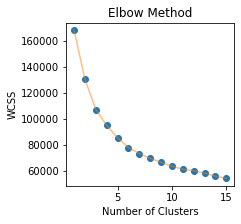

In [119]:
# finding out the proper number of clusters
wcss = []
for i in range(1,16):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(scaled)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(3, 3))
plt.plot(range(1,16), wcss, 'o')
plt.plot(range(1 , 16) , wcss , '-' , alpha = 0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('Elbow_Method.png')
plt.show()

In [120]:
# instantiating model
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(scaled)
len(y_kmeans)

169909

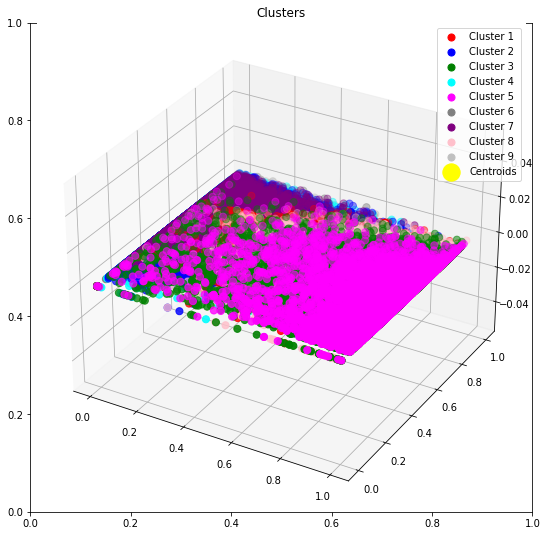

In [121]:
from mpl_toolkits.mplot3d import Axes3D
# visualizing clusters
scaled=scaled.values
fig, ax = plt.subplots(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled[y_kmeans == 0,0],scaled[y_kmeans == 0,1], s= 50, c= 'red',label= 'Cluster 1')
plt.scatter(scaled[y_kmeans == 1,0], scaled[y_kmeans == 1,1], s= 50, c= 'blue', label= 'Cluster 2')
plt.scatter(scaled[y_kmeans == 2,0], scaled[y_kmeans == 2,1], s= 50, c= 'green', label= 'Cluster 3')
plt.scatter(scaled[y_kmeans == 3,0], scaled[y_kmeans == 3,1], s= 50, c= 'cyan', label= 'Cluster 4')
plt.scatter(scaled[y_kmeans == 4,0], scaled[y_kmeans == 4,1], s= 50, c= 'magenta', label= 'Cluster 5')
plt.scatter(scaled[y_kmeans == 5,0], scaled[y_kmeans == 5,1], s= 50, c= 'gray', label= 'Cluster 6')
plt.scatter(scaled[y_kmeans == 6,0], scaled[y_kmeans == 6,1], s= 50, c= 'purple', label= 'Cluster 7')
plt.scatter(scaled[y_kmeans == 7,0], scaled[y_kmeans == 7,1], s= 50, c= 'pink', label= 'Cluster 8')
plt.scatter(scaled[y_kmeans == 8,0], scaled[y_kmeans == 8,1], s= 50, c= 'silver', label= 'Cluster 9')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s= 300, c= 'yellow', label= 'Centroids')
plt.title('Clusters')
plt.legend()
plt.savefig('clusters.png')
plt.show()

In [122]:
kmeans = pd.DataFrame(data=y_kmeans, dtype=int)
kmeans.columns = ['k_cluster']

# predictions as a df
print(kmeans.shape)
kmeans.head()

(169909, 1)


k_cluster
0          2
1          2
2          0
3          4
4          2

In [123]:
# concatenating the cluster column to the dataframe
df_cluster = pd.concat([df_cluster, kmeans], axis=1)

# checking the dataframe
print(df_cluster.shape)
df_cluster.head()

(169909, 20)


acousticness                                   artists  danceability  \
0         0.995                       ['Carl Woitschach']         0.708   
1         0.994  ['Robert Schumann', 'Vladimir Horowitz']         0.379   
2         0.604                   ['Seweryn Goszczyński']         0.749   
3         0.995                      ['Francisco Canaro']         0.781   
4         0.990  ['Frédéric Chopin', 'Vladimir Horowitz']         0.210   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       158648  0.1950         0  6KbQ3uYMLKb5jDxLF7wYDD             0.563   
1       282133  0.0135         0  6KuQTIu1KoTTkLXKrwlLPV             0.901   
2       104300  0.2200         0  6L63VW0PibdM1HDSBoqnoM             0.000   
3       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8             0.887   
4       687733  0.2040         0  6N6tiFZ9vLTSOIxkj8qKrd             0.908   

   key  liveness  loudness  mode  \
0   10    0.1510   -12.428     1   
1    8    0.0763   -28.454     1   
2    5    0.1190   -19.924     0   
3    1    0.1110   -14.734     0   
4   11    0.0980   -16.829     1   

                                            name  popularity release_date  \
0                    Singende Bataillone 1. Teil           0         1928   
1       Fantasiestücke, Op. 111: Più tosto lento           0         1928   
2                 Chapter 1.18 - Zamek kaniowski           0         1928   
3  Bebamos Juntos - Instrumental (Remasterizado)           0   1928-09-25   
4    Polonaise-Fantaisie in A-Flat Major, Op. 61           1         1928   

   speechiness    tempo  valence  year  k_cluster  
0       0.0506  118.469   0.7790  1928          2  
1       0.0462   83.972   0.0767  1928          2  
2       0.9290  107.177   0.8800  1928          0  
3       0.0926  108.003   0.7200  1928          4  
4       0.0424   62.149   0.0693  1928          2

In [124]:
# popularity mean by cluster
df_cluster.groupby(['k_cluster']).popularity.mean().sort_values(ascending=False)

k_cluster
6    48.208549
8    45.746136
5    44.807151
1    42.826131
3    42.238964
7    18.467736
0    17.950824
4    14.531860
2    13.321176
Name: popularity, dtype: float64

In [125]:
# checking number of songs in each cluster
df_cluster['k_cluster'].value_counts()

7    38092
1    30776
3    26414
5    21369
2    16698
0    14377
8     8410
4     7784
6     5989
Name: k_cluster, dtype: int64

In [126]:
# checking the songs in the cluster
df_cluster.loc[df_cluster['k_cluster'] == 4][:10]

acousticness                                            artists  \
3          0.995                               ['Francisco Canaro']   
5          0.995         ['Felix Mendelssohn', 'Vladimir Horowitz']   
10         0.994       ['Sergei Rachmaninoff', 'Vladimir Horowitz']   
11         0.989           ['Frédéric Chopin', 'Vladimir Horowitz']   
14         0.977  ['Ludwig van Beethoven', 'Staatskapelle Berlin...   
17         0.994                ['Francisco Canaro', 'Luis Scalon']   
32         0.422                              ['Shungi Music Crew']   
41         0.993         ['Dmitry Kabalevsky', 'Vladimir Horowitz']   
42         0.990           ['Frédéric Chopin', 'Vladimir Horowitz']   
58         0.991                                ['Ignacio Corsini']   

    danceability  duration_ms  energy  explicit                      id  \
3          0.781       180760  0.1300         0  6M94FkXd15sOAOQYRnWPN8   
5          0.424       352600  0.1200         0  6NxAf7M8DNHOBTmEd3JSO5   
10         0.376       590293  0.0719         0  6QBInZBkQNIQYU9gGzT5l4   
11         0.170        85133  0.0823         0  6QIONtzbQCbnmWNwn0H1yT   
14         0.335       276563  0.1050         0  6Rwn56jcC0TdGQzbRl7NGw   
17         0.787       167107  0.1560         0  6TFuAErGpJ9FpxQQ1HC8nM   
32         0.662       372962  0.6060         0  6XxKNIhZQsW1A5Sg6O32Is   
41         0.372       285133  0.0945         0  6h6ShFPagQGy48KSFd8BU9   
42         0.337       333907  0.0699         0  6hUMURfCaJ6JB8EWL1ZLr7   
58         0.431       108573  0.3150         0  6mlX2fWNqtclyBUAyBHNQ5   

    instrumentalness  key  liveness  loudness  mode  \
3              0.887    1    0.1110   -14.734     0   
5              0.911    6    0.0915   -19.242     0   
10             0.883   10    0.1960   -21.849     0   
11             0.911   10    0.0962   -30.107     0   
14             0.840    5    0.2310   -16.049     0   
17             0.659    4    0.1100   -14.056     0   
32             0.915    7    0.0594    -7.026     0   
41             0.941   10    0.1890   -22.709     0   
42             0.903    5    0.1060   -23.806     0   
58             0.883   11    0.1080   -21.753     0   

                                                 name  popularity  \
3       Bebamos Juntos - Instrumental (Remasterizado)           0   
5                         Scherzo a capriccio: Presto           0   
10  Piano Sonata No. 2 in B-Flat Minor, Op. 36: I....           0   
11     Piano Sonata No. 2, Op. 35: IV. Finale. Presto           1   
14      Symphony No. 5 in C Minor, Op. 67: 3. Allegro           0   
17                Invocación al Tango - Remasterizado           0   
32                                         Loving You           0   
41        Sonata No. 3, Op. 46: II. Andante cantabile           0   
42                    Nocturne F Minor, Op. 55, No. 1           2   
58                    Caido del Cielo - Remasterizado           0   

   release_date  speechiness    tempo  valence  year  k_cluster  
3    1928-09-25       0.0926  108.003   0.7200  1928          4  
5          1928       0.0593   63.521   0.2660  1928          4  
10         1928       0.0352  141.390   0.0393  1928          4  
11         1928       0.0317   85.989   0.3460  1928          4  
14   1928-01-01       0.0716   80.204   0.4060  1928          4  
17   1928-09-16       0.1570  117.167   0.8490  1928          4  
32   1928-08-20       0.0376  111.999   0.6450  1928          4  
41         1928       0.0317   59.217   0.0791  1928          4  
42         1928       0.0322   72.133   0.1350  1928          4  
58   1928-05-14       0.0464   65.735   0.7110  1928          4

In [127]:
# statistical distribution of the data in each column, for each cluster
df_cluster.groupby("k_cluster").describe() 

acousticness                                                         \
                 count      mean       std       min       25%     50%    75%   
k_cluster                                                                       
0              14377.0  0.809373  0.177169  0.000000  0.707000  0.8550  0.960   
1              30776.0  0.217827  0.214232  0.000000  0.027100  0.1500  0.368   
2              16698.0  0.901094  0.165207  0.000000  0.890000  0.9730  0.992   
3              26414.0  0.213677  0.214615  0.000000  0.023600  0.1410  0.360   
4               7784.0  0.890040  0.181352  0.000000  0.875000  0.9720  0.992   
5              21369.0  0.158734  0.180148  0.000000  0.012600  0.0854  0.258   
6               5989.0  0.186270  0.209495  0.000001  0.026700  0.1030  0.281   
7              38092.0  0.836934  0.145458  0.000000  0.751000  0.8740  0.961   
8               8410.0  0.172964  0.215460  0.000002  0.017625  0.0833  0.247   

                 danceability            ...  valence            year  \
             max        count      mean  ...      75%    max    count   
k_cluster                                ...                            
0          0.996      14377.0  0.510549  ...  0.70300  0.995  14377.0   
1          0.958      30776.0  0.569494  ...  0.82100  1.000  30776.0   
2          0.996      16698.0  0.417283  ...  0.64575  0.990  16698.0   
3          0.936      26414.0  0.564617  ...  0.80700  0.999  26414.0   
4          0.996       7784.0  0.419287  ...  0.63900  0.986   7784.0   
5          0.884      21369.0  0.587724  ...  0.79800  1.000  21369.0   
6          0.996       5989.0  0.684428  ...  0.68000  0.972   5989.0   
7          0.996      38092.0  0.501576  ...  0.69500  1.000  38092.0   
8          0.993       8410.0  0.673017  ...  0.67200  0.981   8410.0   

                                                                           
                  mean        std     min     25%     50%     75%     max  
k_cluster                                                                  
0          1959.432705  19.424012  1921.0  1947.0  1957.0  1969.0  2020.0  
1          1990.887347  16.599577  1924.0  1978.0  1991.0  2005.0  2020.0  
2          1955.954246  22.233454  1921.0  1941.0  1951.0  1964.0  2020.0  
3          1989.904293  16.701737  1925.0  1977.0  1990.0  2004.0  2020.0  
4          1956.965185  22.469811  1921.0  1942.0  1952.0  1966.0  2020.0  
5          1993.364032  15.924269  1924.0  1981.0  1994.0  2007.0  2020.0  
6          1999.585407  25.594891  1921.0  1997.0  2009.0  2017.0  2020.0  
7          1960.703140  19.760034  1921.0  1948.0  1958.0  1971.0  2020.0  
8          1996.672889  27.132798  1921.0  1994.0  2006.0  2016.0  2020.0  

[9 rows x 120 columns]

Conclusions

Analyzing the clusters, we can see that they make sense, and I would definitely find these a good combination of songs. In production-type recommendation systems we often have user data, and other features that can make recommendations more sophisticated and precise. We did the best we could with the tools we had.

It's also interesting to mention that:

    Most famous song are in cluster number 6.
    Popularity Mean among some clusters is very similar while in some it is very low
    Cluster 7 has considerably higher counts of songs but is yet one of the lowest clusters in terms of mean popularity.
